## Analysis of XRP data based on rolling averages

In [1]:
import pandas as pd
import numpy as np

In [7]:
import re

In [88]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
XRP_increase = pd.read_csv("XRP_Increase_SmallAmount.csv")

In [34]:
XRP_decrease = pd.read_csv("XRP_Decrease_SmallAmount.csv")

In [42]:
try:
    del XRP_increase['Decrease_0.1_percent']
except:
    print('Not found')

In [31]:
#### For getting rid of rounding error

In [37]:
# for col in [d for d in XRP_decrease.columns if '_percent' in d]:
#     print(col , ',,' , re.sub(regex, '_',col))
#     XRP_decrease.rename(columns= {col : re.sub(regex, '_',col)}, inplace = True)

In [43]:
list(np.intersect1d(XRP_decrease.columns,XRP_increase.columns))

['Unnamed: 0',
 'Unnamed: 0.1',
 'close',
 'date',
 'datetime_real',
 'high',
 'low',
 'open',
 'quoteVolume',
 'volume',
 'weightedAverage']

In [46]:
[d for d in XRP_decrease.columns if '_percent' in d]

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.5_percent']

In [44]:
intersect_columns = [d for d in np.intersect1d(XRP_decrease.columns,XRP_increase.columns) if d not in ['Unnamed: 0','Unnamed: 0.1']]

In [50]:
XRP_Analysis_table = XRP_increase[intersect_columns + ['Increase_0.2_percent']]

In [51]:
XRP_Analysis_table = XRP_Analysis_table.merge(XRP_decrease[['date','Decrease_0.1_percent']], on='date',how = 'left')

## XRP_Analysis_table

## Currently:
- increase 0.2, decrease 0.1

In [64]:
XRP_Analysis_table.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Decrease_0.1_percent,2H_RA_on_Close
0,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,1455001200,1424964600,NaN
1,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,NaN
2,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,NaN
3,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,0.024997
4,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,0.024997


In [53]:
from matplotlib.pylab import rcParams 

In [54]:
rcParams['figure.figsize'] = 20,10

In [55]:
# XRP_in1_de1['1H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2).mean()
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(2*2).mean()
# XRP_in1_de1['4H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['8H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['12H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()

####  2H rolling seems okay

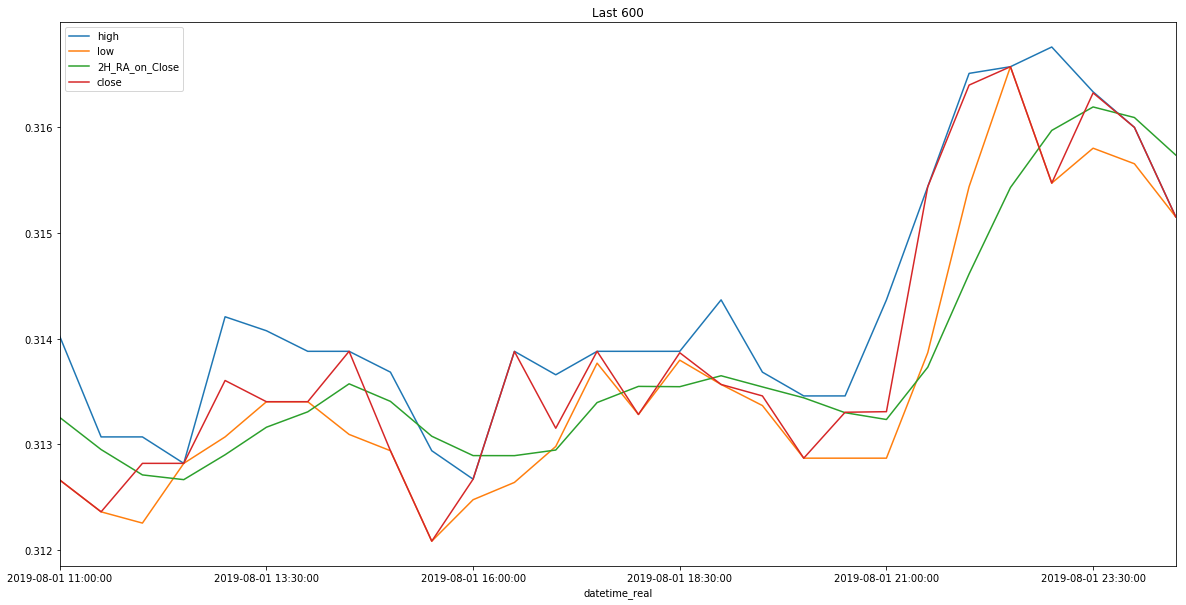

In [56]:
XRP_Analysis_table[['high','low','2H_RA_on_Close','close','datetime_real']][-28:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

In [57]:
XRP_Analysis_table[-28:]['high'].max()

0.31676036

In [58]:
0.31208458

0.31208458

In [59]:
(0.31676036 - 0.31208458)/0.31208458

0.014982412780535387

In [335]:
test_code = XRP_Analysis_table[-5000:]

In [336]:
len(test_code)

5000

In [337]:
test_code['increa_decre'] = test_code['Increase_0.2_percent'] < test_code['Decrease_0.1_percent']

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [338]:
test_code['is_decre'] = test_code['Increase_0.2_percent'] >= test_code['Decrease_0.1_percent']

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [339]:
winning_percent = test_code[test_code['increa_decre']]

In [340]:
test_code['2H_RA_on_Close'] = test_code['2H_RA_on_Close'].shift(-1) #due to make decisions based on the last 30min

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [341]:
test_code['below_2H_RA'] =  (test_code['low'] - test_code['2H_RA_on_Close'])/test_code['2H_RA_on_Close']

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [342]:
test_code['colour'] = test_code['increa_decre'].apply(lambda x: 'Green' if x else 'Orange')

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [343]:
test_code.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Decrease_0.1_percent,2H_RA_on_Close,increa_decre,is_decre,below_2H_RA,colour
72735,0.330390,1555709400,2019-04-19 22:30:00,0.330688,0.330390,0.330427,720.492935,238.163179,0.330556,1555736400,1555713000,0.330172,False,True,0.000659,Orange
72736,0.330390,1555711200,2019-04-19 23:00:00,0.330390,0.330390,0.330390,0.000000,0.000000,0.330390,1555736400,1555713000,0.330009,False,True,0.001156,Orange
72737,0.329000,1555713000,2019-04-19 23:30:00,0.329600,0.329000,0.329600,24563.194229,8082.315862,0.329042,1555714800,1555732800,0.330076,True,False,-0.003260,Green
72738,0.330524,1555714800,2019-04-20 00:00:00,0.330524,0.329078,0.329078,15585.684631,5148.066171,0.330307,1555716600,1555732800,0.330109,True,False,-0.003126,Green
72739,0.330524,1555716600,2019-04-20 00:30:00,0.330524,0.330524,0.330524,0.000000,0.000000,0.330524,1555738200,1555718400,0.330049,False,True,0.001437,Orange


### try with by feeding low first, then high, and again with high, then low

In [344]:
starting_asset = 100

In [345]:
test_code.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Decrease_0.1_percent,2H_RA_on_Close,increa_decre,is_decre,below_2H_RA,colour
72735,0.330390,1555709400,2019-04-19 22:30:00,0.330688,0.330390,0.330427,720.492935,238.163179,0.330556,1555736400,1555713000,0.330172,False,True,0.000659,Orange
72736,0.330390,1555711200,2019-04-19 23:00:00,0.330390,0.330390,0.330390,0.000000,0.000000,0.330390,1555736400,1555713000,0.330009,False,True,0.001156,Orange
72737,0.329000,1555713000,2019-04-19 23:30:00,0.329600,0.329000,0.329600,24563.194229,8082.315862,0.329042,1555714800,1555732800,0.330076,True,False,-0.003260,Green
72738,0.330524,1555714800,2019-04-20 00:00:00,0.330524,0.329078,0.329078,15585.684631,5148.066171,0.330307,1555716600,1555732800,0.330109,True,False,-0.003126,Green
72739,0.330524,1555716600,2019-04-20 00:30:00,0.330524,0.330524,0.330524,0.000000,0.000000,0.330524,1555738200,1555718400,0.330049,False,True,0.001437,Orange


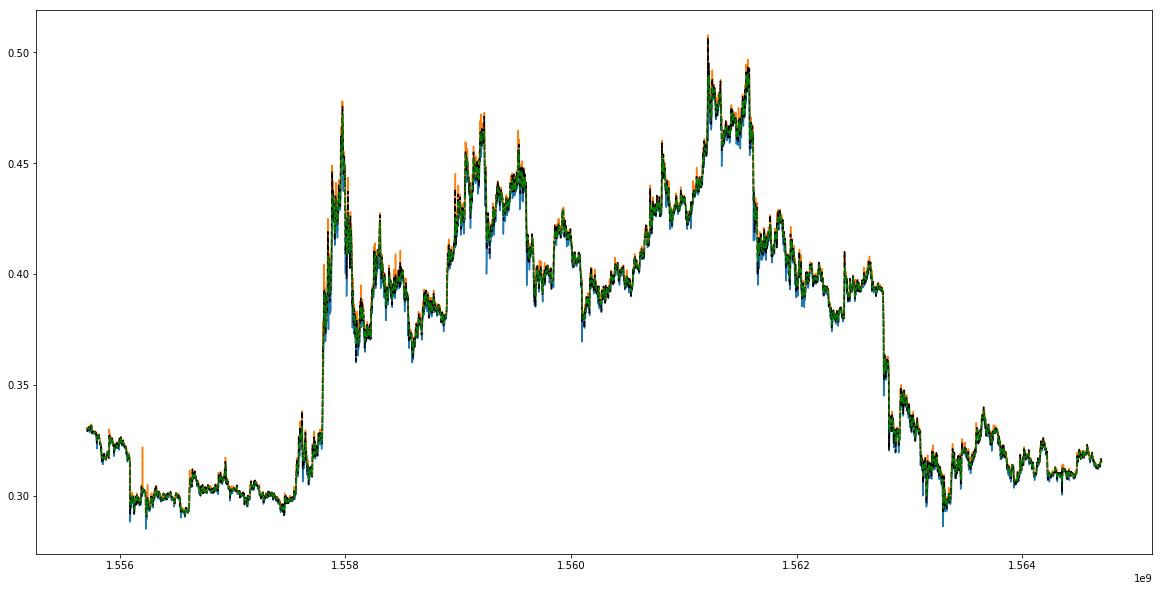

In [346]:
plt.plot(test_code['date'], test_code['low'])
plt.plot(test_code['date'], test_code['high'])
plt.plot(test_code['date'], test_code['close'], 'k--')
plt.plot(test_code['date'], test_code['2H_RA_on_Close'], 'g--')

In [347]:
len(test_code)

5000

In [348]:
np.arange(0,len(test_code), 500)

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

In [349]:
temp_table['datetime_real'].min()

'2019-07-22 15:00:00'

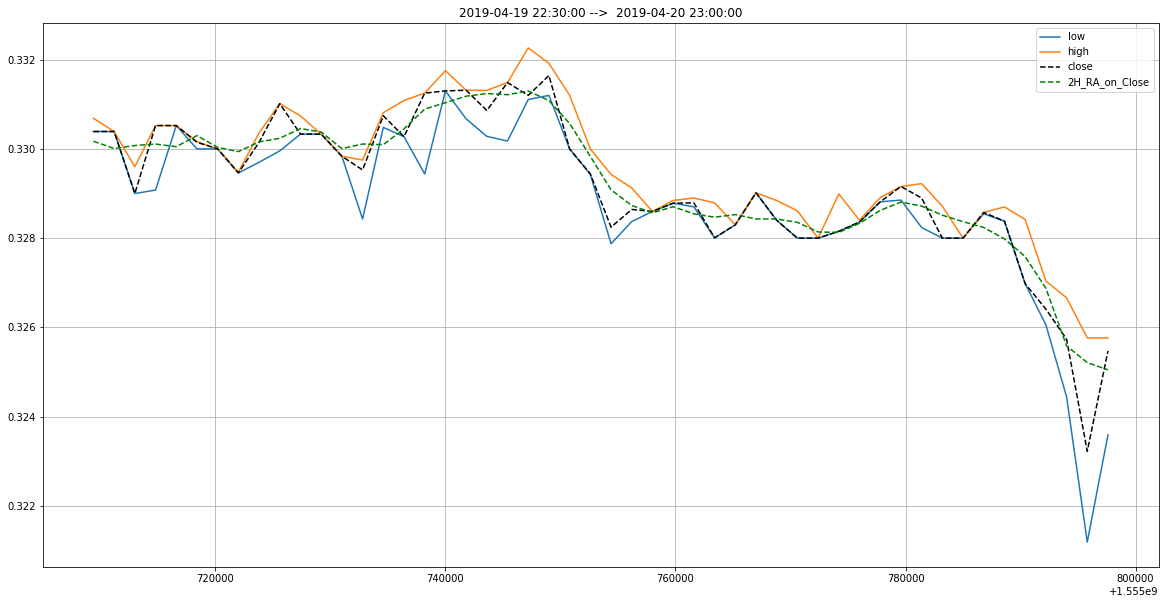

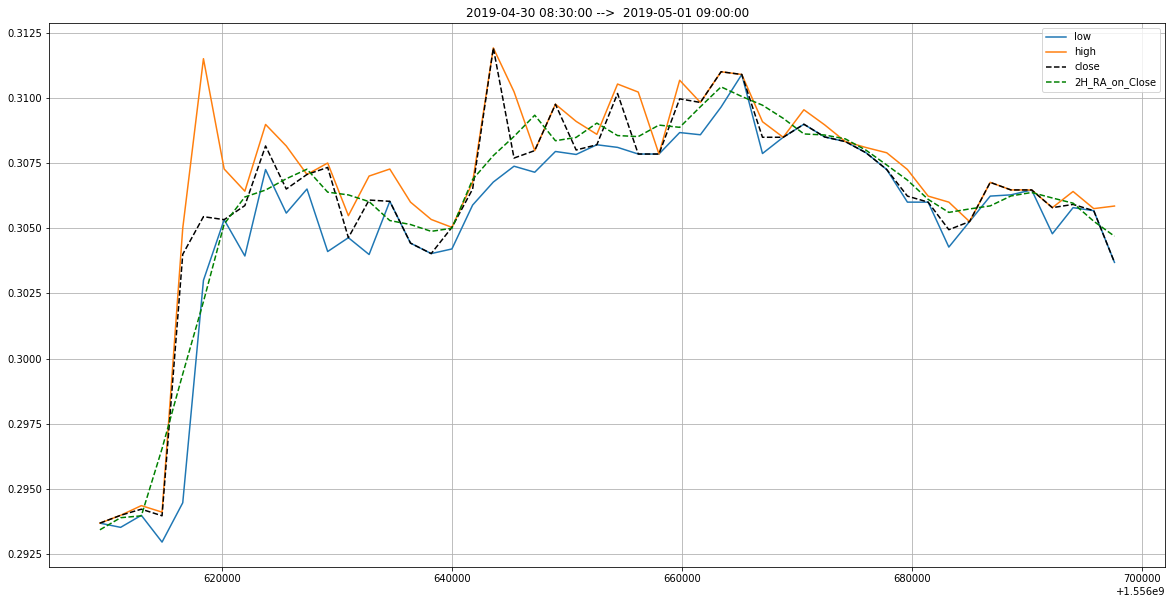

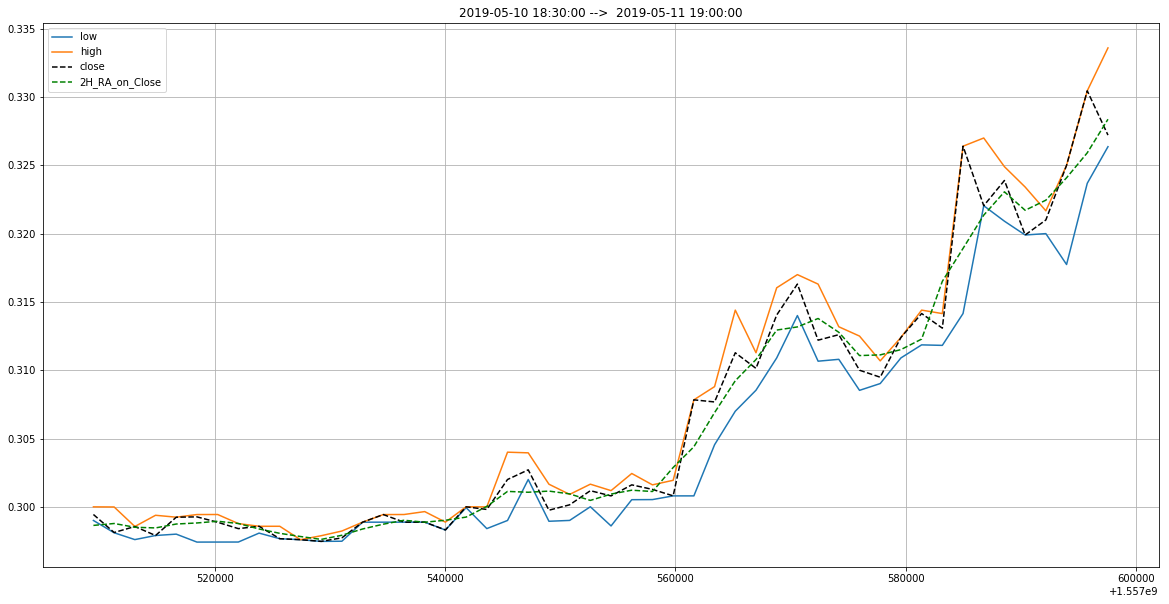

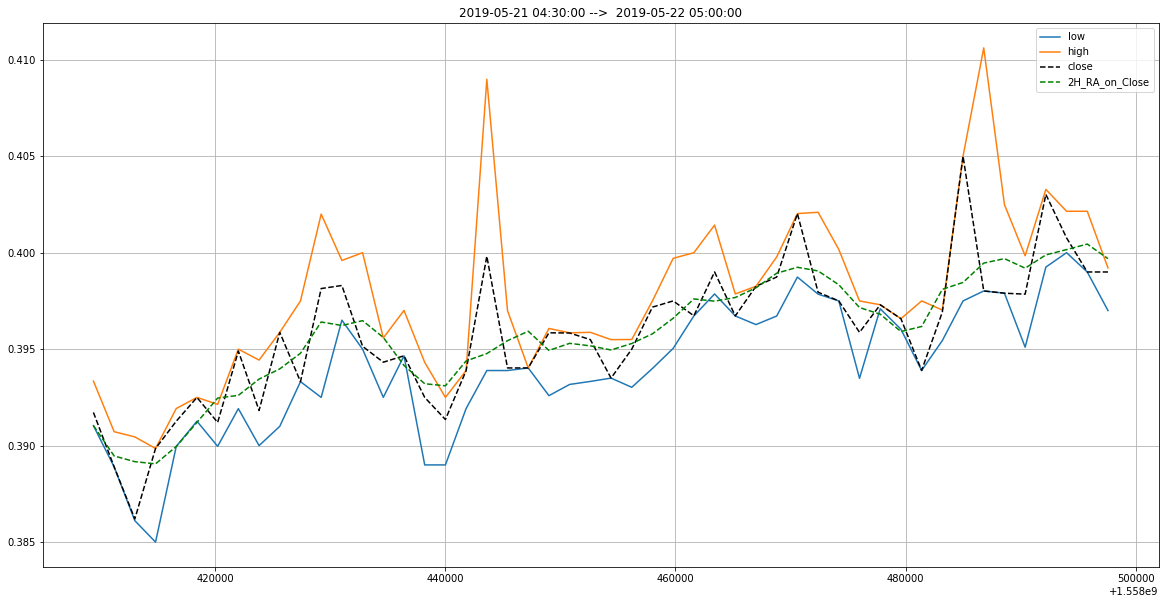

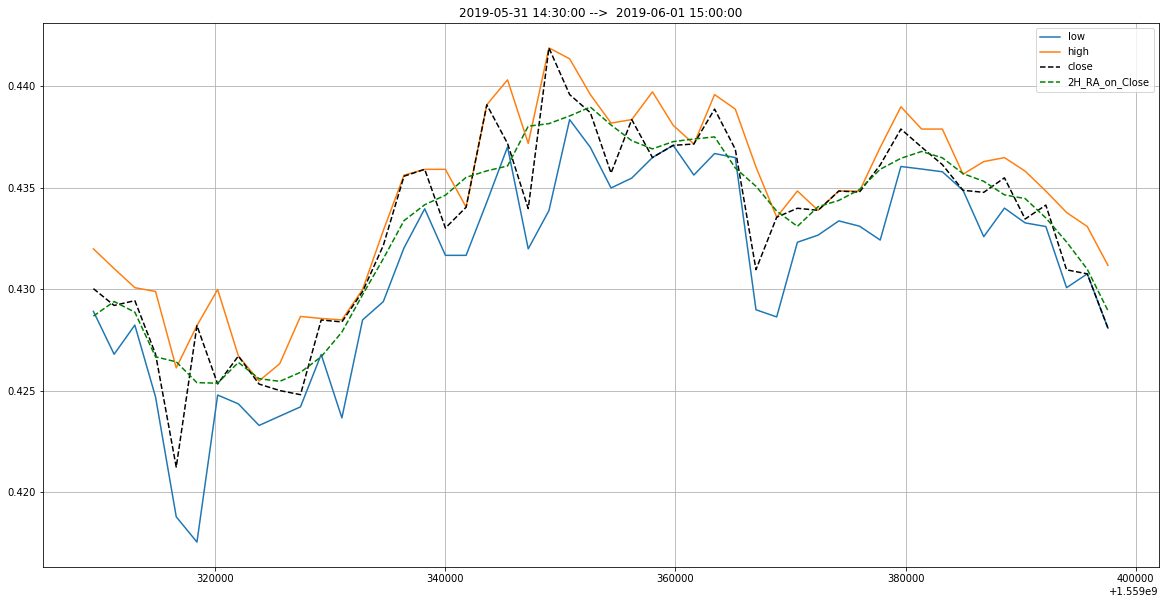

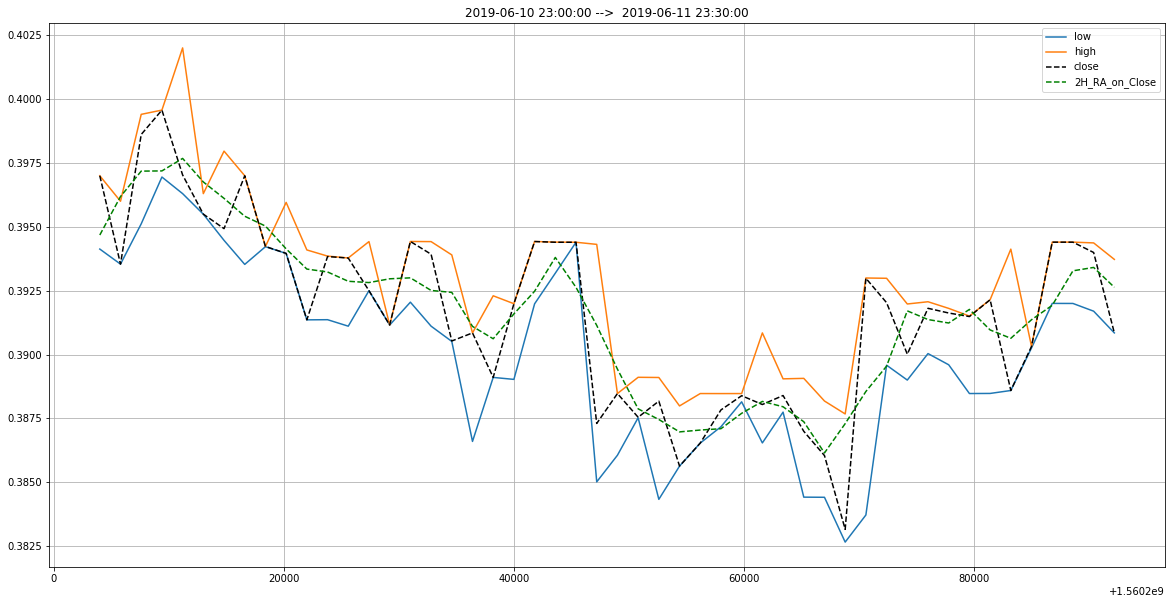

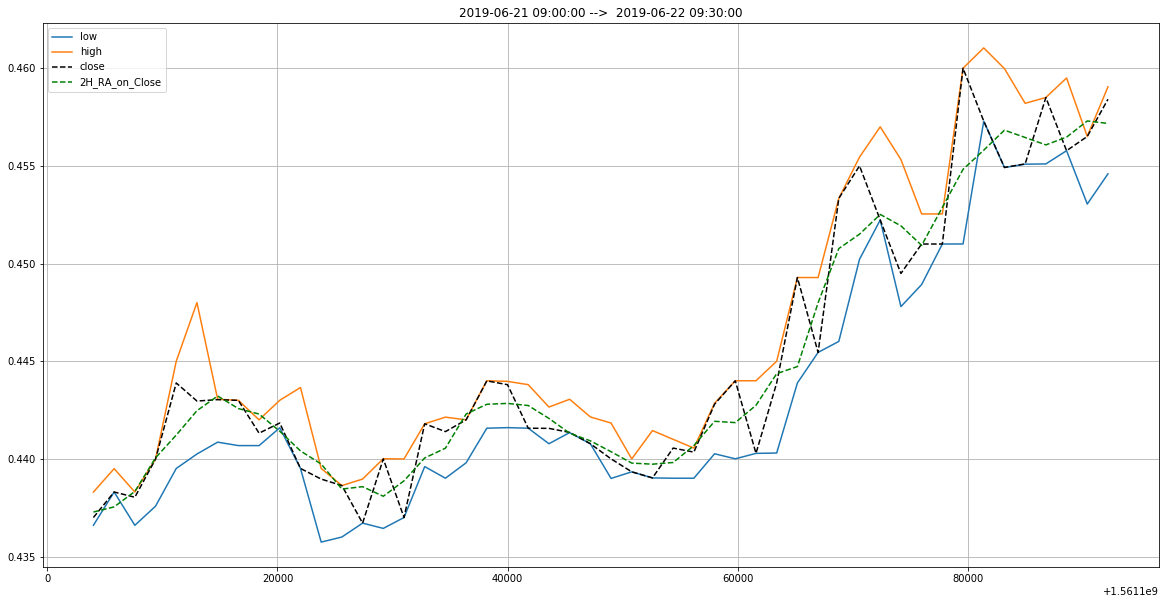

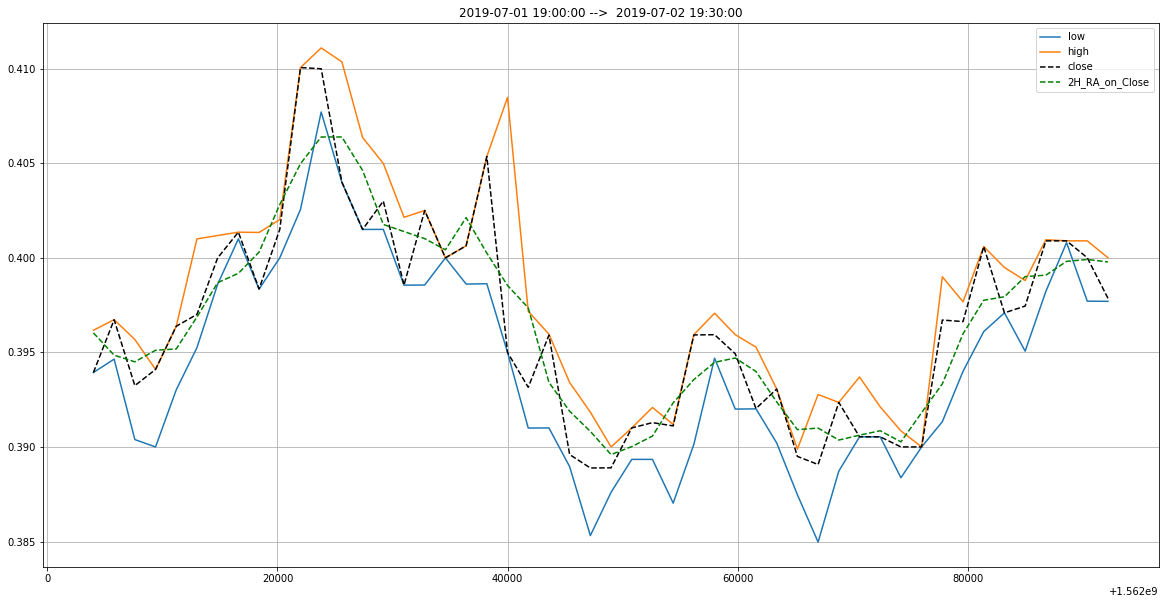

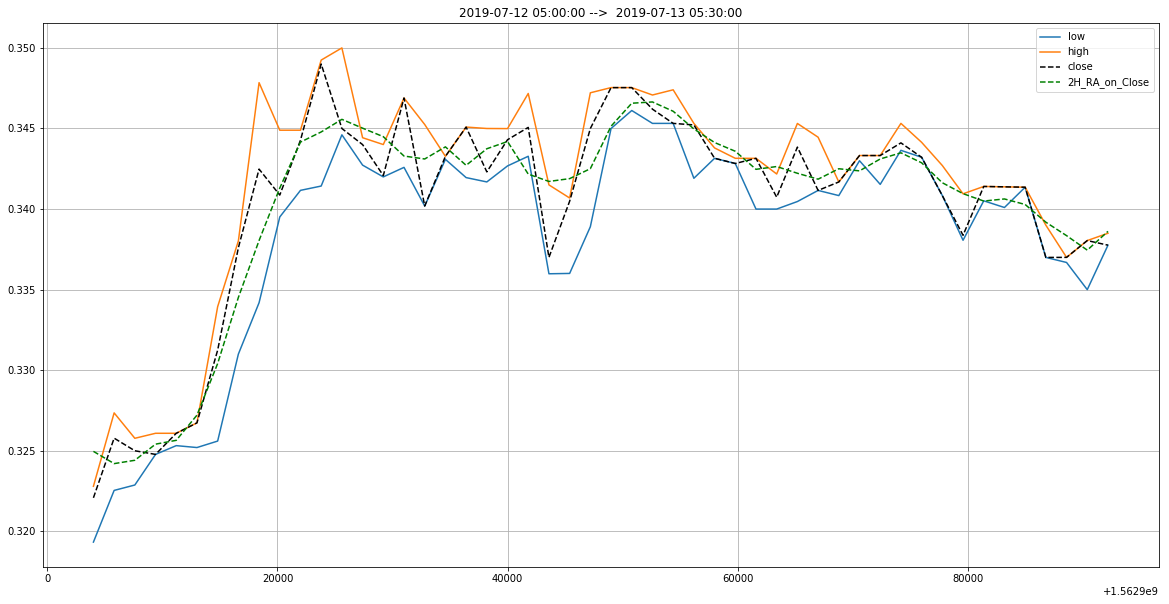

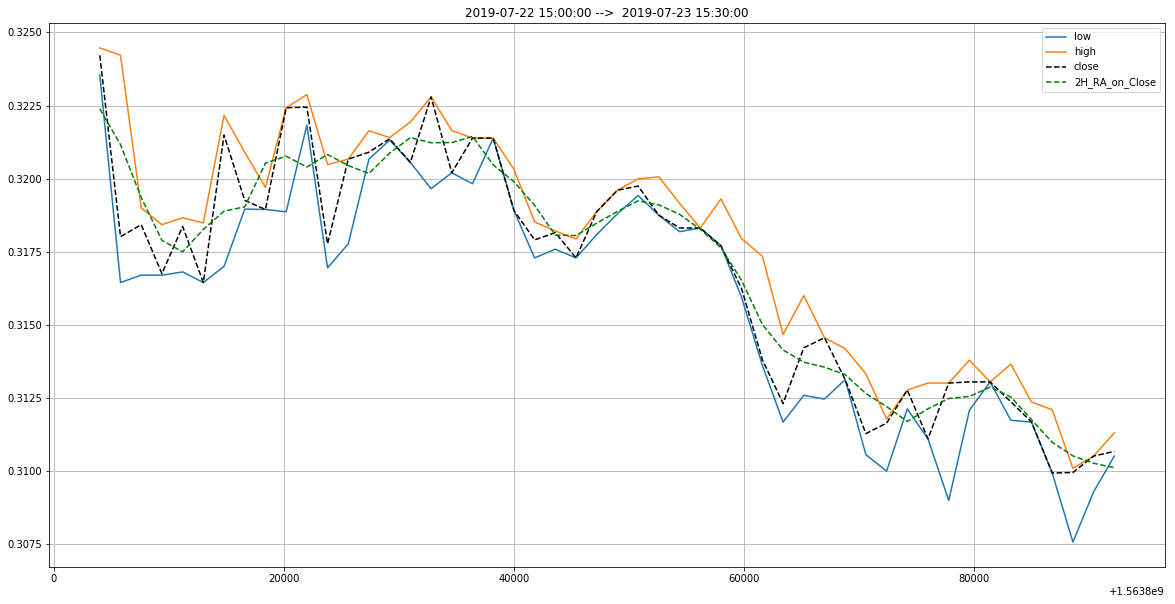

In [350]:
break_down_points = np.arange(0,len(test_code), 500)

for value in break_down_points:
    temp_table = test_code[value: value+50]
    
    plt.plot(temp_table['date'], temp_table['low'], label ='low')
    plt.plot(temp_table['date'], temp_table['high'], label ='high')
    plt.plot(temp_table['date'], temp_table['close'], 'k--', label ='close')
    plt.plot(temp_table['date'], temp_table['2H_RA_on_Close'], 'g--', label ='2H_RA_on_Close')
    plt.title('{0} -->  {1}'.format(temp_table['datetime_real'].min(), temp_table['datetime_real'].max()))
    plt.grid()
    plt.legend()
    plt.show()

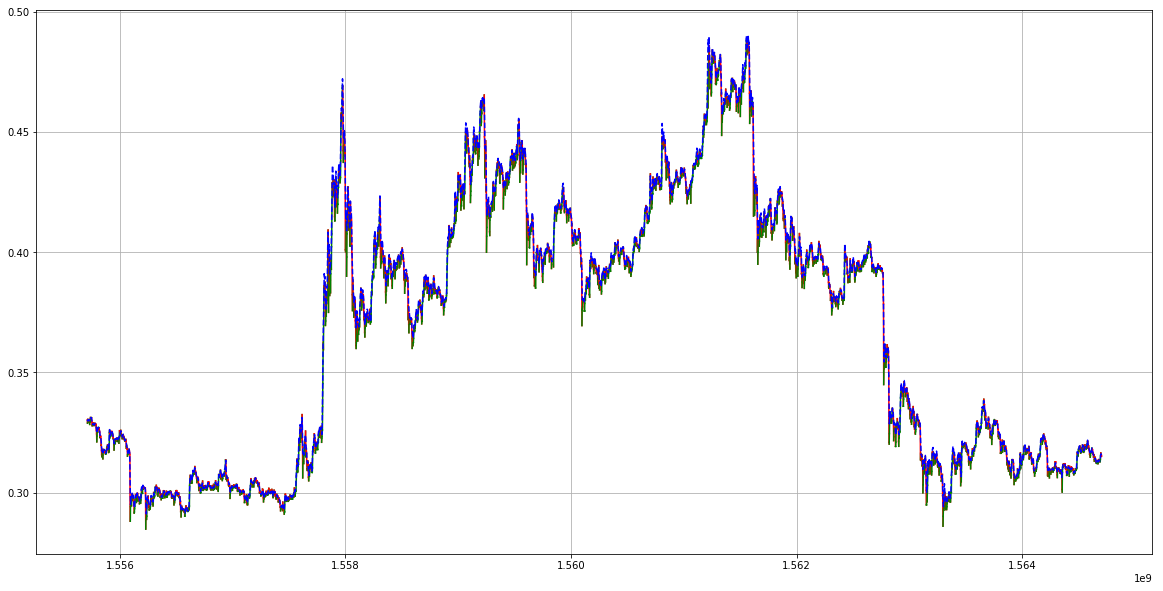

In [351]:
x = test_code['date']
y = test_code['low']
color = test_code['colour']



for x_p, x_p1, y_p, y_p1 , c_p in zip(x, x[1:] , y, y[1:], color):
    if c_p == 'Green':
        plt.plot([x_p,x_p1], [y_p,y_p1], 'g-')
        
    else:
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'r')


plt.plot(test_code['date'], test_code['2H_RA_on_Close'], 'b--')
plt.grid()
plt.show()


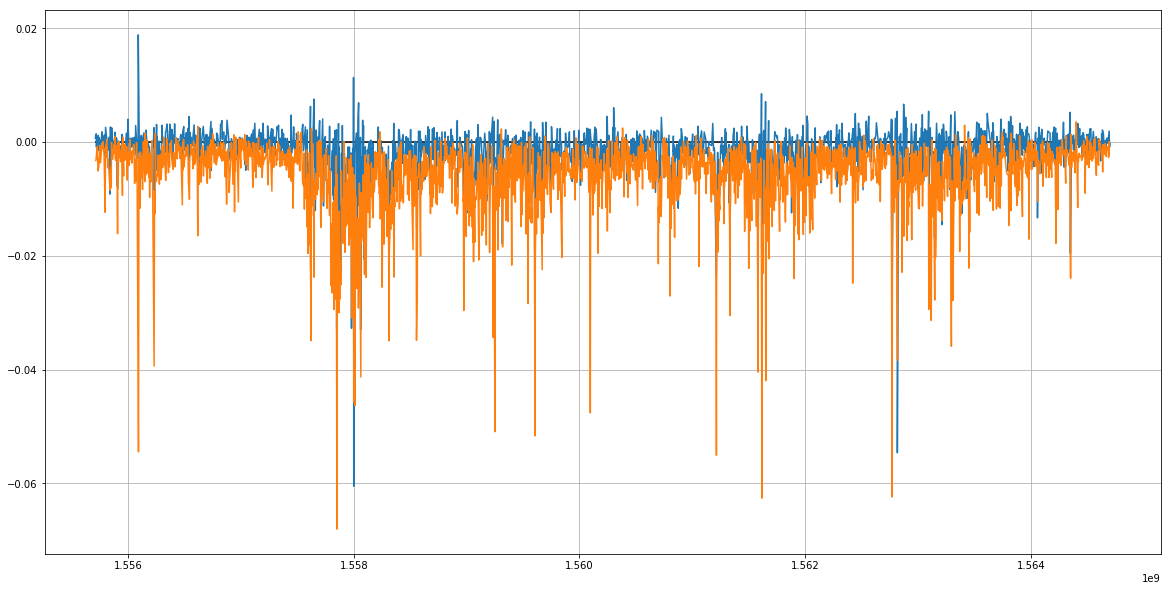

In [352]:
g1 = test_code[~test_code['increa_decre']][['date','below_2H_RA']]
g2 = test_code[test_code['increa_decre']][['date','below_2H_RA']]

plt.plot(g1['date'], g1['below_2H_RA'])
plt.plot(g2['date'], g2['below_2H_RA'])

plt.hlines(y= 0 , xmin = test_code['date'].min() , xmax= test_code['date'].max())
plt.grid()
plt.show()

In [368]:
pd.DataFrame([10,10,30]).describe()

,0
count,3.000000
mean,16.666667
std,11.547005
min,10.000000
25%,10.000000
50%,10.000000
75%,20.000000
max,30.000000


In [367]:
pd.DataFrame([1,1,3]).describe()

,0
count,3.000000
mean,1.666667
std,1.154701
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [353]:
g1['below_2H_RA'].describe()

count    2043.000000
mean       -0.001853
std         0.004398
min        -0.060506
25%        -0.003064
50%        -0.000954
75%         0.000424
max         0.018818
Name: below_2H_RA, dtype: float64

In [354]:
g2['below_2H_RA'].describe()

count    2956.000000
mean       -0.005533
std         0.005959
min        -0.068048
25%        -0.007072
50%        -0.004031
75%        -0.002052
max         0.003531
Name: below_2H_RA, dtype: float64

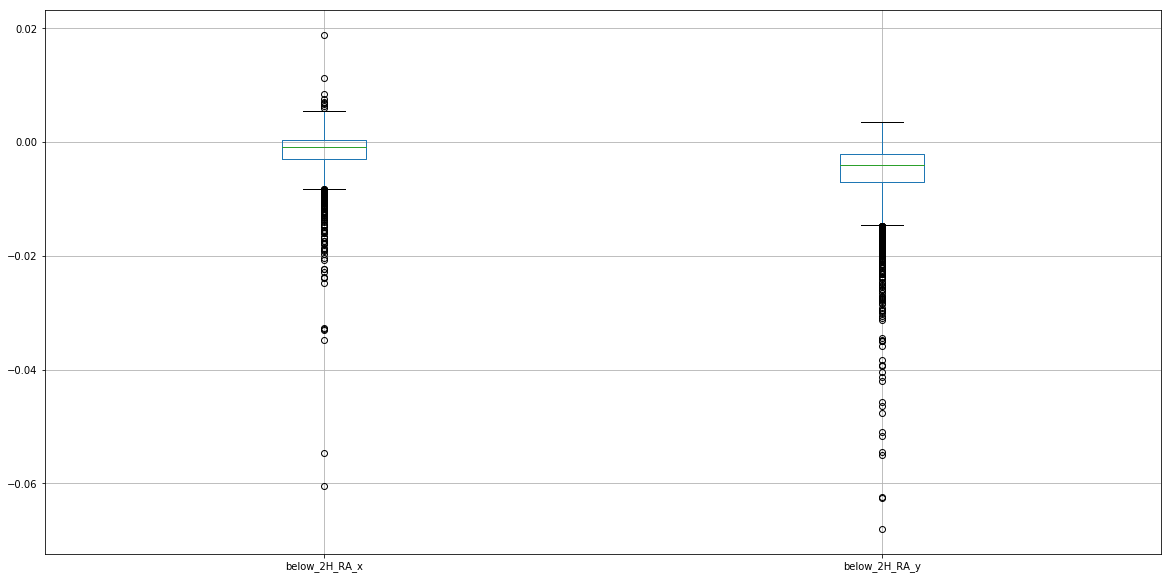

In [355]:
g1.merge(g2, on ='date', how='outer').boxplot(column=['below_2H_RA_x','below_2H_RA_y'])

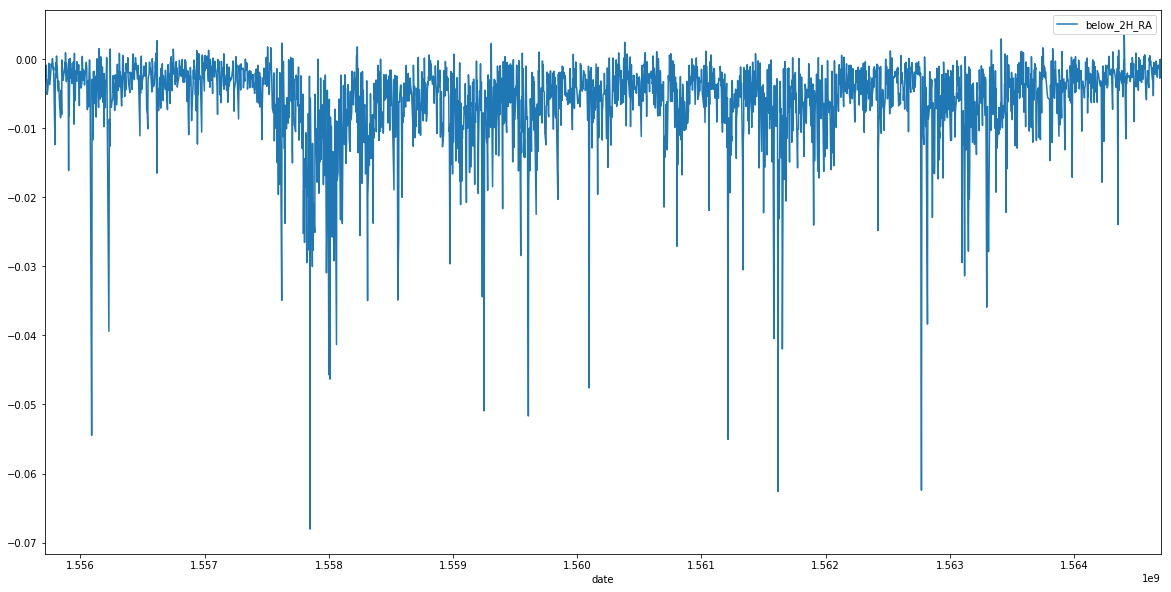

In [356]:
test_code[test_code['increa_decre']][['date','below_2H_RA']].set_index('date').plot()

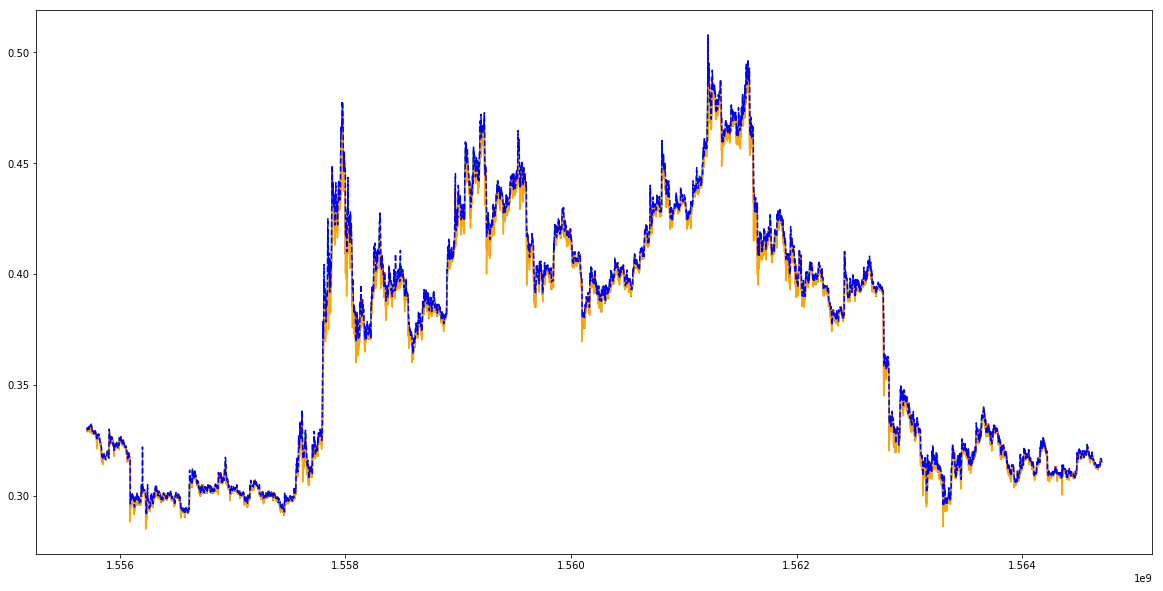

In [357]:
x = test_code['date']
y = test_code['close']
y_low = test_code['low']
y_high = test_code['high']
ra = test_code['2H_RA_on_Close']
color = test_code['colour']

for x_p, x_p1, y_p, y_p1 , c_p in zip(x, x[1:] , y, y[1:], color):
    if c_p == 'Green':
        plt.plot([x_p,x_p1], [y_p,y_p1], 'g-')
        
    else:
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'r')
        
plt.plot(x, ra,'--')
plt.plot(x, y_low,'orange')
plt.plot(x, y_high, 'b--')
plt.show()

## Running trade

- for 0.004 before 2H

0.4% below

each trade costs: 0.2% (so each sell needs to deduct 0.2%)

low supply first, then high

In [319]:
starting_asset = 100

In [324]:
XRP_Analysis_table.head()

,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_0.2_percent,Decrease_0.1_percent,2H_RA_on_Close
0,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,1455001200,1424964600,NaN
1,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,NaN
2,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,NaN
3,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,0.024997
4,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424964600,0.024997


In [ ]:


def action_decision(action_time, value, RA_2H_Value):
    
    
    
    

In [330]:
time_event = {}

for ind, df in XRP_Analysis_table.iterrows()[3:]:
    

1424462400
